In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
def secant_method(f, epsilon, x_0):
    """
    利用弦截法迭代逼近方程的根
    :param f: 方程 f(x) = 0,lambda类型
    :param epsilon: 最大误差
    :param x_0: 迭代起点
    :return:
    """
    x_1 = 1
    x_list = [x_0, x_1]

    i = 1
    while abs(x_list[i] - x_list[i - 1]) > epsilon:
        x_new = x_list[i] - (f(x_list[i]) * (x_list[i] - x_list[i - 1])) / (f(x_list[i]) - f(x_list[i - 1]))
        x_list.append(x_new)
        i += 1

    return np.array(x_list)

In [14]:
f = lambda x: x ** 3 - x - 1
epsilon = 0.0001
x_0 = 1.5
x_list = secant_method(f, epsilon, x_0)
x_list

array([1.5       , 1.        , 1.26666667, 1.34829721, 1.32341229,
       1.3246897 , 1.32471799])

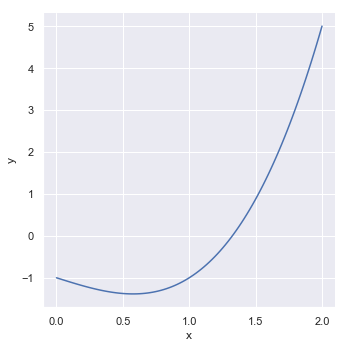

In [15]:
xx = np.linspace(0,2,100)
yy = f(xx)
sns.set(color_codes=True)
df = pd.DataFrame.from_dict(dict(x=xx,y=yy))
g = sns.relplot(x='x',y='y',data=df,kind='line')


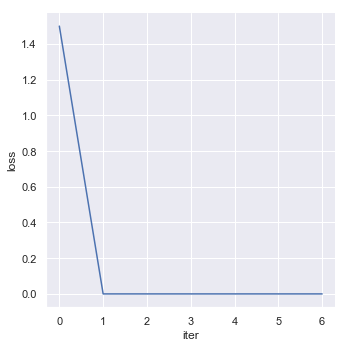

In [16]:
x_list
loss = [0]
loss.extend(x_list[1:]) 
loss = x_list - loss
loss
sns.relplot(x='iter',y='loss',kind='line',data=pd.DataFrame.from_dict(
    dict(iter=range(len(loss)),loss=loss))
)